# Creating the Model Boundary

This workbook explains the steps for creating a model boundary using the Sagehen Creek watershed as an example. The first step is to download a DEM for the watershed of interest. A DEM can be attained from https://www.usgs.gov/core-science-systems/ngp/tnm-delivery/ and slecting "Elevation Products" under "Data." The next step is to creat a pour point at the outlet of the whatershed. Some watersheds have multiple outflow points; however, in our example there is a single outflow point called "model_points.shp" located in the sagehen shapefile directory. Model outflow points can be created in ArcMap.

In [1]:
import arcpy
import geopandas
import sys, os
import matplotlib.pyplot as plt
from arcpy import env
from arcpy.sa import *
arcpy.CheckOutExtension("Spatial")

u'CheckedOut'

In [2]:
#over write option set to true
arcpy.env.overwriteOutput = True
print arcpy.env.overwriteOutput
os.getcwd()

True


'C:\\Users\\rniswon\\Documents\\Data\\Git\\gsflowID2447_classrepo\\exercises\\saghen_prms\\notebook'

The first step is to fill sinks (swales) in the raw DEM using the Fill tool.

In [3]:
# set the workspace directory where the DEM is located.
env.workspace = r"..\examples\sagehen\dem"
# set the name of the dem
inSurfaceRaster = "imgn40w121_13_clipped.img"
outSurfaceRaster = "imgn40w121_13_filled.img"
zLimit = 3.28
outFill = Fill(inSurfaceRaster, zLimit) 
outFill.save(outSurfaceRaster)

The next step is to generate the flow direction raster from the DEM. The flow direction raster will be used for the Watershed tool.

In [5]:
outFlowDirection = FlowDirection("imgn40w121_13_filled.img", "NORMAL")
outFlowDirection.save(r"..\examples\sagehen\shapefiles\flowdir")

Now that we have the DEM, flow direction, and pour point datasets we can run the Watershed tool

In [6]:
#Reset the environmental workspace
env.workspace = r"..\examples\sagehen\shapefiles"
inFlowDirection = "flowdir"
inPourPointData = "model_points.shp"
inPourPointField = "FID"
outWatershed = Watershed(inFlowDirection, inPourPointData, inPourPointField) 
outWatershed.save("watershed")

As Geopandas plots shapefiles, we run the raster to polygon conversion tool.

In [7]:
inRaster="watershed"
outPolygons="watershed"
arcpy.RasterToPolygon_conversion(inRaster, outPolygons, "NO_SIMPLIFY")

<Result '..\\examples\\sagehen\\shapefiles\\watershed.shp'>

In [8]:
# input data is in NAD 1983 UTM Zone 11N coordinate system
input_features = "watershed.shp"

# output data
output_feature_class = "watershed_proj.shp"

# create a spatial reference object for the output coordinate system
out_coordinate_system = arcpy.SpatialReference('NAD 1983 UTM Zone 11N')

# run the tool
arcpy.Project_management(input_features, output_feature_class, out_coordinate_system)

<Result '..\\examples\\sagehen\\shapefiles\\watershed_proj.shp'>

Now we can plot the model boundary and outflow point.

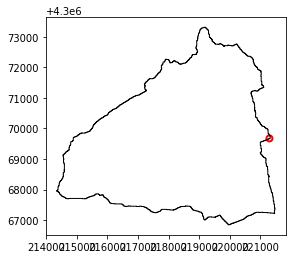

In [11]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
fn1=r"..\examples\sagehen\shapefiles\watershed_proj.shp"
fn2=r"..\examples\sagehen\shapefiles\model_points.shp"
boundary=geopandas.read_file(fn1)
gage=geopandas.read_file(fn2)
gage.plot(ax=ax,color='none', edgecolor='red', linewidth=2.0)
boundary.plot(ax=ax,color='none', edgecolor='black', linewidth=1.0)
plt.show()